## 📖 Importação das bibliotecas

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## 🪐 Universos e variáveis

In [2]:
dist_univ = np.linspace(0, 10, 100)
ang_univ = np.linspace(0, 10, 100)
guinhada_univ = np.linspace(0, 1.57, 100)
vel_univ = np.linspace(0, 15, 100)

dist = ctrl.Antecedent(dist_univ, 'dist')
ang = ctrl.Antecedent(ang_univ, 'ang')
guinhada = ctrl.Consequent(guinhada_univ, 'guinhada')
vel = ctrl.Consequent(vel_univ, 'vel')

## 🧮 Funções de pertinência para `dist`, `ang`, `guinhada` e `vel`
## 📏 Regras para `guinhada` e `vel`

In [3]:
dist['Pequena'] = fuzz.pimf(dist_univ, 0, 0, 2.5, 4)
dist['Longa'] = fuzz.trapmf(dist_univ, [2.5, 4, 6, 7.5])
dist['MuitoLonga'] = fuzz.trapmf(dist_univ, [6, 7.5, 10, 10])

ang['Pequeno'] = fuzz.pimf(ang_univ, 0, 0, 3, 5)
ang['Médio'] = fuzz.trapmf(ang_univ, [3, 5, 6, 8])
ang['Amplo'] = fuzz.trapmf(ang_univ, [6, 8, 10, 10])

guinhada['Zero'] = fuzz.zmf(guinhada_univ, 0.0, 0.4)
guinhada['Modesta'] = fuzz.pimf(guinhada_univ, 0.2, 0.4, 0.6, 0.8)
guinhada['Média'] = fuzz.pimf(guinhada_univ, 0.6, 0.8, 1.0, 1.2)
guinhada['Grande'] = fuzz.pimf(guinhada_univ, 1.0, 1.2, 1.3, 1.45)
guinhada['Severa'] = fuzz.smf(guinhada_univ, 1.3, 1.57)

vel['Lenta'] = fuzz.pimf(vel_univ, 0, 0, 5, 7.5)
vel['Rápida'] = fuzz.trapmf(vel_univ, [5, 7.5, 10, 12.5])
vel['MuitoRápida'] = fuzz.trapmf(vel_univ, [10, 12.5, 15, 15])

rules = [
    ctrl.Rule(dist['Pequena'] & ang['Pequeno'], guinhada['Severa']),
    ctrl.Rule(dist['Pequena'] & ang['Médio'], guinhada['Grande']),
    ctrl.Rule(dist['Pequena'] & ang['Amplo'], guinhada['Média']),
    ctrl.Rule(dist['Longa'] & ang['Pequeno'], guinhada['Grande']),
    ctrl.Rule(dist['Longa'] & ang['Médio'], guinhada['Média']),
    ctrl.Rule(dist['Longa'] & ang['Amplo'], guinhada['Modesta']),
    ctrl.Rule(dist['MuitoLonga'] & ang['Pequeno'], guinhada['Média']),
    ctrl.Rule(dist['MuitoLonga'] & ang['Médio'], guinhada['Modesta']),
    ctrl.Rule(dist['MuitoLonga'] & ang['Amplo'], guinhada['Zero']),
    ctrl.Rule(dist['Pequena'], vel['Lenta']),
    ctrl.Rule(dist['Longa'], vel['Rápida']),
    ctrl.Rule(dist['MuitoLonga'], vel['MuitoRápida'])
]

c:\Users\gabri\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\membership\generatemf.py:316: RuntimeWarning: invalid value encountered in divide
  y[idx] = 2. * ((x[idx] - a) / (b - a)) ** 2.


## 💻 Sistema e simulação

In [4]:
system = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(system)

# Exemplo de entrada
sim.input['dist'] = 3.0
sim.input['ang'] = 2.0
sim.compute()

print("Guinhada:", sim.output['guinhada'])
print("Velocidade:", sim.output['vel'])


Guinhada: 1.359008977816321
Velocidade: nan


## 📈 Visualização dos gráficos de pertinência

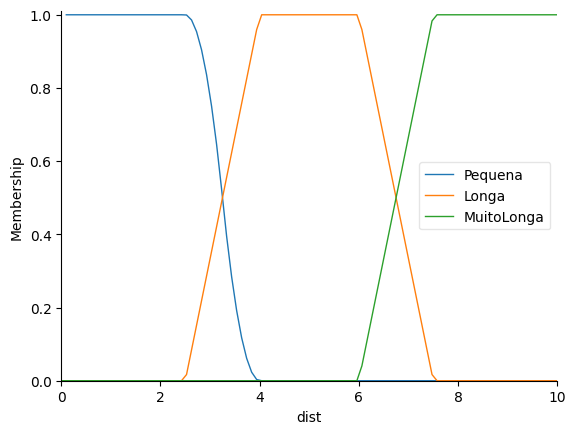

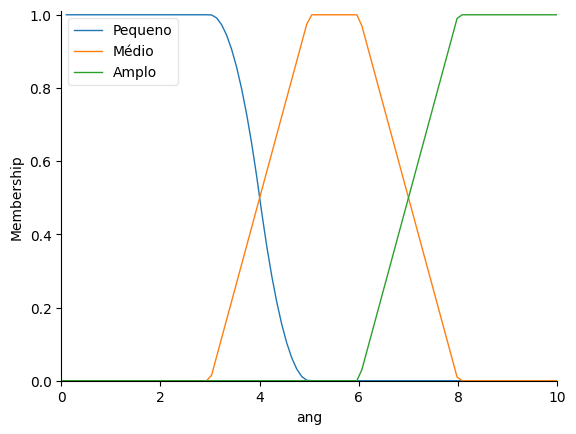

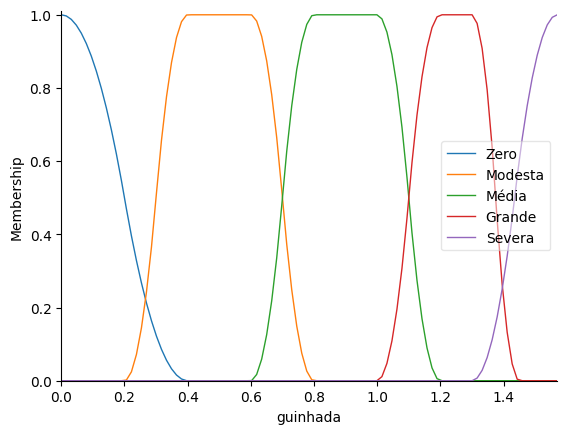

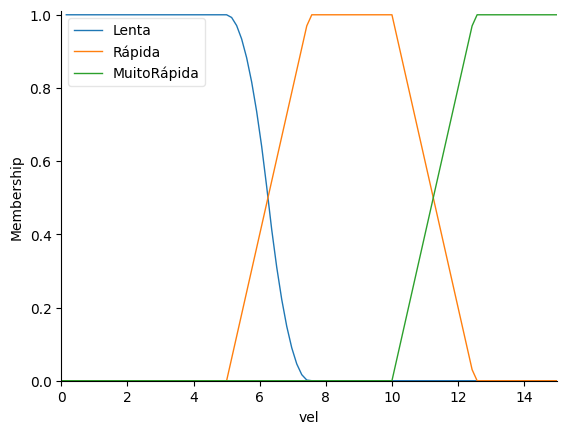

In [6]:
dist.view()
ang.view()
guinhada.view()
vel.view()